## Esercizio 11.2
### Metodo 1

Estendo in questo esercizio il modello precedente per la regressione lineare al caso di un polinomio di terzo grado

$$
f(x)=4-3x-2x^2+3x^3
$$

Nel dominio $x \in [-1,1]$.




Costruisco la rete neurale nel seguente modo:
- Non utilizzo un solo valore in input, ma bensì tre valori e un solo output. I tre valori sono le coordinate sono $(x,x^2,x^3)$.
- Non ho necessità di utilizzare più layer e neanche una funzione di attivazione. Quindi la rete è composta da un solo layer con un neurone che riceve tre valori in input e ne restituisce uno.
- I punti sui quali alleno la rete sono $N_{train}=3000$ e per la validazione utilizzo $N_{valid}=300$ punti. Le epoche sono 100 anche se già dopo la 80-esima circa la rete smette di imparare.

Il fit è molto buono, la rete riproduce molto bene la curva f.

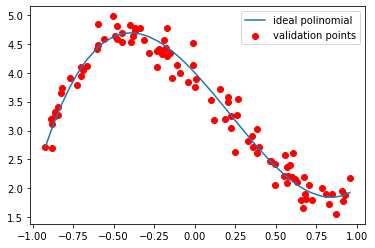

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a=3
b=-2
c=-3
d=4
N_train=3000
N_valid=100


#genero i punti in input
np.random.seed(0)

x_train=np.empty([N_train,3])
for i in range(0,N_train):
    x=np.random.uniform(-1,1,1)
    x_train[i,0]=x
    x_train[i,1]=x**2
    x_train[i,2]=x**3

x_valid=np.empty([N_valid,3])
for i in range(0,N_valid):
    x=np.random.uniform(-1,1)
    x_valid[i,0]=x
    x_valid[i,1]=x**2
    x_valid[i,2]=x**3

#ordino rispetto alla prima colonna
sortindexes=x_valid[:,0].argsort()
x_valid=x_valid[sortindexes]

y_target = a*x_valid[:,2] + b*x_valid[:,1] + c*x_valid[:,0] + d

#ecco le y_valid e y_train con rumore:
sigma=0.2
y_train= np.random.normal(a*x_train[:,2] + b*x_train[:,1] + c*x_train[:,0] + d, sigma)
y_valid= np.random.normal(a*x_valid[:,2] + b*x_valid[:,1] + c*x_valid[:,0] + d, sigma)


#plottiamo e vediamo
plt.scatter(x_valid[:,0],y_valid,c='r',label='validation points')
plt.plot(x_valid[:,0],y_target,label='ideal polinomial')
plt.legend()
plt.show()


In [2]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects


model=tf.keras.Sequential()
model.add(Dense(1,input_shape=(3,)))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [3]:
history = model.fit(x=x_train, y=y_train, batch_size=32,
          epochs=100, shuffle=True, validation_data=(x_valid, y_valid))

model.get_weights()

Train on 3000 samples, validate on 100 samples
Epoch 1/100
3000/3000 [==============================] - 1s 383us/sample - loss: 4.2910 - mse: 4.2910 - val_loss: 1.3461 - val_mse: 1.3461
Epoch 2/100
3000/3000 [==============================] - 0s 88us/sample - loss: 1.0682 - mse: 1.0682 - val_loss: 0.7414 - val_mse: 0.7414
Epoch 3/100
3000/3000 [==============================] - 0s 85us/sample - loss: 0.7574 - mse: 0.7574 - val_loss: 0.5559 - val_mse: 0.5559
Epoch 4/100
3000/3000 [==============================] - 0s 85us/sample - loss: 0.6124 - mse: 0.6124 - val_loss: 0.4515 - val_mse: 0.4515
Epoch 5/100
3000/3000 [==============================] - 0s 88us/sample - loss: 0.5134 - mse: 0.5134 - val_loss: 0.3783 - val_mse: 0.3783
Epoch 6/100
3000/3000 [==============================] - 0s 87us/sample - loss: 0.4390 - mse: 0.4390 - val_loss: 0.3253 - val_mse: 0.3253
Epoch 7/100
3000/3000 [==============================] - 0s 87us/sample - loss: 0.3815 - mse: 0.3815 - val_loss: 0.2847 - va

3000/3000 [==============================] - 0s 86us/sample - loss: 0.0477 - mse: 0.0477 - val_loss: 0.0462 - val_mse: 0.0462
Epoch 60/100
3000/3000 [==============================] - 0s 83us/sample - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0459 - val_mse: 0.0459
Epoch 61/100
3000/3000 [==============================] - 0s 82us/sample - loss: 0.0467 - mse: 0.0467 - val_loss: 0.0456 - val_mse: 0.0456
Epoch 62/100
3000/3000 [==============================] - 0s 82us/sample - loss: 0.0463 - mse: 0.0463 - val_loss: 0.0453 - val_mse: 0.0453
Epoch 63/100
3000/3000 [==============================] - 0s 82us/sample - loss: 0.0459 - mse: 0.0459 - val_loss: 0.0451 - val_mse: 0.0451
Epoch 64/100
3000/3000 [==============================] - 0s 83us/sample - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0447 - val_mse: 0.0447
Epoch 65/100
3000/3000 [==============================] - 0s 83us/sample - loss: 0.0451 - mse: 0.0451 - val_loss: 0.0445 - val_mse: 0.0445
Epoch 66/100
3000/3000 [================

[array([[-2.8936248],
        [-1.9985573],
        [ 2.8230448]], dtype=float32),
 array([3.9966533], dtype=float32)]

100/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

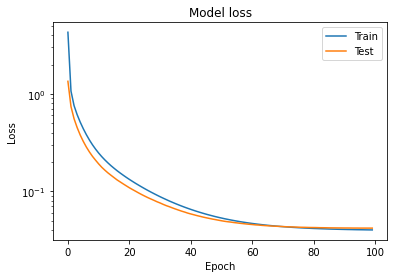

In [4]:
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.yscale('log')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

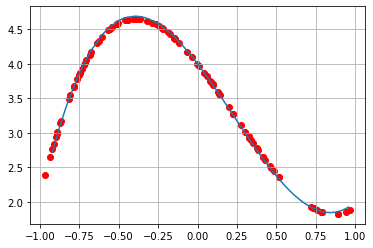

In [5]:
x_predicted=np.empty([100,3])
for i in range(0,100):
    x=np.random.uniform(-1,1)
    x_predicted[i,0]=x
    x_predicted[i,1]=x**2
    x_predicted[i,2]=x**3
    

y_predicted = model.predict(x_predicted)

plt.scatter(x_predicted[:,0], y_predicted,color='r')
plt.plot(x_valid[:,0], y_target)
plt.grid(True)
plt.show()

Ora provo a predirre punti che non sono all'interno dell'intervallo nel quale la rete ha imparato. Utilizzo $x \in (1,2)$.

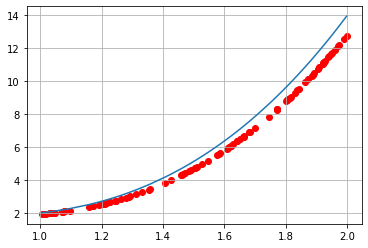

In [6]:
x_predicted=np.empty([100,3])
for i in range(0,100):
    x=np.random.uniform(1,2)
    x_predicted[i,0]=x
    x_predicted[i,1]=x**2
    x_predicted[i,2]=x**3

#ordino
ind = x_predicted[:,0].argsort()
x_predicted=x_predicted[ind]

y_predicted = model.predict(x_predicted)
y_real = a*x_predicted[:,2] + b*x_predicted[:,1] + c*x_predicted[:,0] + d

plt.scatter(x_predicted[:,0], y_predicted,color='r')
plt.plot(x_predicted[:,0], y_real)
plt.grid(True)
plt.show()

Come si evince dal grafico la rete, mano a mano che ci allontana dall'intervallo nel quale erano presenti i punti di training, perde il suo potere predittivo e i punti non seguono più l'andamento del target.